In [60]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [45]:
data1 = pd.read_csv('../data/uncleaned/ckd1.csv')

In [46]:
data1.head()

,bp (Diastolic),bp limit,sg,al,Unnamed: 4,rbc,su,pc,pcc,ba,...,dm,cad,appet,pe,ane,grf,stage,age,class,affected
0,0,0,1.019 - 1.021,01-Jan,NaN,0,< 0,0,0,0,...,0,0,0,0,0,? 227.944,s1,< 12,ckd,1
1,0,0,1.009 - 1.011,< 0,NaN,0,< 0,0,0,0,...,0,0,0,0,0,? 227.944,s1,< 12,ckd,1
2,0,0,1.009 - 1.011,? 4,NaN,1,< 0,1,0,1,...,0,0,1,0,0,127.281 - 152.446,s1,< 12,ckd,1
3,1,1,1.009 - 1.011,03-Mar,NaN,0,< 0,0,0,0,...,0,0,0,0,0,127.281 - 152.446,s1,< 12,ckd,1
4,0,0,1.015 - 1.017,< 0,NaN,0,< 0,0,0,0,...,1,0,1,1,0,127.281 - 152.446,s1,Dec-20,ckd,1


In [6]:
data1.columns

Index(['bp (Diastolic)', 'bp limit', 'sg', 'al', 'rbc', 'su', 'pc', 'pcc',
       'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc', 'wbcc',
       'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage', 'age',
       'class', 'affected'],
      dtype='object')

In [7]:
data1.dtypes

bp (Diastolic)     int64
bp limit           int64
sg                object
al                object
rbc                int64
su                object
pc                 int64
pcc                int64
ba                 int64
bgr               object
bu                object
sod               object
sc                object
pot               object
hemo              object
pcv               object
rbcc              object
wbcc              object
htn                int64
dm                 int64
cad                int64
appet              int64
pe                 int64
ane                int64
grf               object
stage             object
age               object
class             object
affected           int64
dtype: object

In [8]:
categ_data = data1.select_dtypes('object')

In [9]:
import re

# Function to replace '? num' with '> num'
def replace_question_mark(val):
    if isinstance(val, str):
        return re.sub(r'\? (\d+(\.\d+)?)', r'> \1', val)
    return val

# Apply the function to each element in the DataFrame
categ_data = categ_data.applymap(replace_question_mark)

In [10]:
categ_data.loc[(categ_data.age == 'Dec-20'), 'age']='12 - 20'
categ_data['age'].value_counts()

age
59 - 66    48
66 - 74    34
51 - 59    33
43 - 51    31
27 - 35    14
35 - 43    12
20 - 27    10
> 74       10
< 12        4
12 - 20     4
Name: count, dtype: int64

In [11]:
categ_data.al = categ_data.al.map({'< 0':'< 0', '02-Feb':'2', '03-Mar':'3', '01-Jan':'1','> 4':'> 4'})
categ_data['al'].value_counts()

al
< 0    116
2       27
3       23
1       21
> 4     13
Name: count, dtype: int64

In [12]:
categ_data['su']=categ_data['su'].map({'< 0':'< 0', '02-Feb':'2 - 3','03-Apr':'3 - 4','04-Apr':'3 - 4','01-Feb':'1 - 2', '> 4':'> 4'})
categ_data['su'].value_counts()

su
< 0      170
3 - 4     14
2 - 3      9
1 - 2      6
> 4        1
Name: count, dtype: int64

In [13]:
categ_data.loc[(categ_data.grf == ' p '), 'grf'] = ' '
categ_data['grf'].value_counts()

grf
< 26.6175            68
26.6175 - 51.7832    38
51.7832 - 76.949     28
76.949 - 102.115     17
102.115 - 127.281    15
127.281 - 152.446    11
152.446 - 177.612     9
177.612 - 202.778     8
202.778 - 227.944     3
> 227.944             2
                      1
Name: count, dtype: int64

In [14]:
for col in categ_data.columns:
    print(categ_data[col].value_counts())
    print()

sg
1.019 - 1.021    75
1.009 - 1.011    45
> 1.023          41
1.015 - 1.017    36
< 1.007           3
Name: count, dtype: int64

al
< 0    116
2       27
3       23
1       21
> 4     13
Name: count, dtype: int64

su
< 0      170
3 - 4     14
2 - 3      9
1 - 2      6
> 4        1
Name: count, dtype: int64

bgr
112 - 154    79
< 112        70
196 - 238    14
154 - 196    13
238 - 280    11
406 - 448     4
280 - 322     4
> 448         3
364 - 406     1
322 - 364     1
Name: count, dtype: int64

bu
< 48.1           108
48.1 - 86.2       53
86.2 - 124.3      16
124.3 - 162.4     11
200.5 - 238.6      5
162.4 - 200.5      5
> 352.9            1
238.6 - 276.7      1
Name: count, dtype: int64

sod
133 - 138    92
138 - 143    49
143 - 148    22
128 - 133    14
148 - 153     9
123 - 128     6
< 118         4
118 - 123     3
> 158         1
Name: count, dtype: int64

sc
< 3.65          159
3.65 - 6.8       22
6.8 - 9.95        9
13.1 - 16.25      4
9.95 - 13.1       4
16.25 - 19.4      1
> 2

In [15]:
data1[data1.select_dtypes('object').columns]=categ_data[categ_data.columns]


In [16]:
for col in data1.columns:
    print(data1[col].value_counts())

bp (Diastolic)
1    108
0     92
Name: count, dtype: int64
bp limit
0    95
1    59
2    46
Name: count, dtype: int64
sg
1.019 - 1.021    75
1.009 - 1.011    45
> 1.023          41
1.015 - 1.017    36
< 1.007           3
Name: count, dtype: int64
al
< 0    116
2       27
3       23
1       21
> 4     13
Name: count, dtype: int64
rbc
0    175
1     25
Name: count, dtype: int64
su
< 0      170
3 - 4     14
2 - 3      9
1 - 2      6
> 4        1
Name: count, dtype: int64
pc
0    155
1     45
Name: count, dtype: int64
pcc
0    173
1     27
Name: count, dtype: int64
ba
0    189
1     11
Name: count, dtype: int64
bgr
112 - 154    79
< 112        70
196 - 238    14
154 - 196    13
238 - 280    11
406 - 448     4
280 - 322     4
> 448         3
364 - 406     1
322 - 364     1
Name: count, dtype: int64
bu
< 48.1           108
48.1 - 86.2       53
86.2 - 124.3      16
124.3 - 162.4     11
200.5 - 238.6      5
162.4 - 200.5      5
> 352.9            1
238.6 - 276.7      1
Name: count, dtype: int6

In [17]:
data1.drop(columns=['class'],inplace=True)

In [18]:
data1.drop(columns=['stage'],inplace=True)

In [19]:
data1[data1['affected']==1]

,bp (Diastolic),bp limit,sg,al,rbc,su,pc,pcc,ba,bgr,...,wbcc,htn,dm,cad,appet,pe,ane,grf,age,affected
0,0,0,1.019 - 1.021,1,0,< 0,0,0,0,< 112,...,7360 - 9740,0,0,0,0,0,0,> 227.944,< 12,1
1,0,0,1.009 - 1.011,< 0,0,< 0,0,0,0,112 - 154,...,12120 - 14500,0,0,0,0,0,0,> 227.944,< 12,1
2,0,0,1.009 - 1.011,> 4,1,< 0,1,0,1,< 112,...,14500 - 16880,0,0,0,1,0,0,127.281 - 152.446,< 12,1
3,1,1,1.009 - 1.011,3,0,< 0,0,0,0,112 - 154,...,7360 - 9740,0,0,0,0,0,0,127.281 - 152.446,< 12,1
4,0,0,1.015 - 1.017,< 0,0,< 0,0,0,0,154 - 196,...,7360 - 9740,0,1,0,1,1,0,127.281 - 152.446,12 - 20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0,0,1.015 - 1.017,1,0,< 0,0,0,0,< 112,...,7360 - 9740,1,0,0,0,0,0,26.6175 - 51.7832,> 74,1
194,0,0,1.015 - 1.017,2,0,< 0,1,1,0,196 - 238,...,12120 - 14500,1,0,0,1,1,1,< 26.6175,> 74,1
195,1,2,1.019 - 1.021,< 0,0,< 0,0,0,0,154 - 196,...,7360 - 9740,1,1,0,0,0,1,26.6175 - 51.7832,> 74,1
196,0,0,1.019 - 1.021,< 0,0,< 0,0,0,0,112 - 154,...,7360 - 9740,0,1,0,0,0,1,< 26.6175,> 74,1


In [20]:
data1.to_csv('./data/cleaned/ckd1.csv')

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bp (Diastolic)  200 non-null    int64 
 1   bp limit        200 non-null    int64 
 2   sg              200 non-null    object
 3   al              200 non-null    object
 4   rbc             200 non-null    int64 
 5   su              200 non-null    object
 6   pc              200 non-null    int64 
 7   pcc             200 non-null    int64 
 8   ba              200 non-null    int64 
 9   bgr             200 non-null    object
 10  bu              200 non-null    object
 11  sod             200 non-null    object
 12  sc              200 non-null    object
 13  pot             200 non-null    object
 14  hemo            200 non-null    object
 15  pcv             200 non-null    object
 16  rbcc            200 non-null    object
 17  wbcc            200 non-null    object
 18  htn       

In [47]:
data1.drop(columns=['Unnamed: 4'], inplace=True)

In [48]:
data1.shape

(200, 29)

In [49]:
categ_feature = []
for col in data1.columns:
    if data1[col].dtype == 'object':
        categ_feature.append(col)

In [50]:
data1.columns

Index(['bp (Diastolic)', 'bp limit', 'sg', 'al', 'rbc', 'su', 'pc', 'pcc',
       'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc', 'wbcc',
       'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage', 'age',
       'class', 'affected'],
      dtype='object')

In [51]:
categ_feature

['sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sod',
 'sc',
 'pot',
 'hemo',
 'pcv',
 'rbcc',
 'wbcc',
 'grf',
 'stage',
 'age',
 'class']

In [52]:
for col in categ_feature:
    print(data1[col].value_counts(),end='\n\n\n')

sg
1.019 - 1.021    75
1.009 - 1.011    45
? 1.023          41
1.015 - 1.017    36
< 1.007           3
Name: count, dtype: int64


al
< 0       116
02-Feb     27
03-Mar     23
01-Jan     21
? 4        13
Name: count, dtype: int64


su
< 0       170
02-Feb      9
03-Apr      8
04-Apr      6
01-Feb      6
? 4         1
Name: count, dtype: int64


bgr
112 - 154    79
< 112        70
196 - 238    14
154 - 196    13
238 - 280    11
406 - 448     4
280 - 322     4
? 448         3
364 - 406     1
322 - 364     1
Name: count, dtype: int64


bu
< 48.1           108
48.1 - 86.2       53
86.2 - 124.3      16
124.3 - 162.4     11
200.5 - 238.6      5
162.4 - 200.5      5
? 352.9            1
238.6 - 276.7      1
Name: count, dtype: int64


sod
133 - 138    92
138 - 143    49
143 - 148    22
128 - 133    14
148 - 153     9
123 - 128     6
< 118         4
118 - 123     3
? 158         1
Name: count, dtype: int64


sc
< 3.65          159
3.65 - 6.8       22
6.8 - 9.95        9
13.1 - 16.25      4
9.9

In [53]:
data1['su'] = data1['su'].map({
    '< 0' : 0,
    '01-Feb' : 1,
    '02-Feb' :  2,
    '03-Apr' :  3
    ,'04-Apr' :  4
    ,'? 4'  :  5})

In [54]:
categ_feature.remove('su')
encoder = LabelEncoder()
for col in categ_feature:
    data1[col] = encoder.fit_transform(data1[col])

In [55]:
len(categ_feature)

15

In [56]:
for col in categ_feature:
    print(data1[col].value_counts(),end='\n\n\n')

sg
2    75
0    45
4    41
1    36
3     3
Name: count, dtype: int64


al
3    116
1     27
2     23
0     21
4     13
Name: count, dtype: int64


bgr
0    79
8    70
2    14
1    13
3    11
7     4
4     4
9     3
6     1
5     1
Name: count, dtype: int64


bu
6    108
4     53
5     16
0     11
2      5
1      5
7      1
3      1
Name: count, dtype: int64


sod
3    92
4    49
5    22
2    14
6     9
1     6
7     4
0     3
8     1
Name: count, dtype: int64


sc
5    159
2     22
3      9
0      4
4      4
1      1
6      1
Name: count, dtype: int64


pot
2    197
3      1
1      1
0      1
Name: count, dtype: int64


hemo
1    49
0    28
3    26
7    23
4    20
2    19
9    15
6    12
8     4
5     4
Name: count, dtype: int64


pcv
5    56
6    29
4    23
3    22
9    19
2    18
7    17
1    10
8     3
0     3
Name: count, dtype: int64


rbcc
3    96
4    23
1    21
2    21
5    18
6     9
0     7
7     4
8     1
Name: count, dtype: int64


wbcc
5    98
4    47
6    29
7    10
0    

In [39]:
data1 = pd.get_dummies(data1)

In [42]:
for col in data1.columns:
    print(col,end=', ')

bp (Diastolic), bp limit, Unnamed: 4, rbc, pc, pcc, ba, htn, dm, cad, appet, pe, ane, affected, sg_1.009 - 1.011, sg_1.015 - 1.017, sg_1.019 - 1.021, sg_< 1.007, sg_? 1.023, al_01-Jan, al_02-Feb, al_03-Mar, al_< 0, al_? 4, su_01-Feb, su_02-Feb, su_03-Apr, su_04-Apr, su_< 0, su_? 4, bgr_112 - 154, bgr_154 - 196, bgr_196 - 238, bgr_238 - 280, bgr_280 - 322, bgr_322 - 364, bgr_364 - 406, bgr_406 - 448, bgr_< 112, bgr_? 448, bu_124.3 - 162.4, bu_162.4 - 200.5, bu_200.5 - 238.6, bu_238.6 - 276.7, bu_48.1 - 86.2, bu_86.2 - 124.3, bu_< 48.1, bu_? 352.9, sod_118 - 123, sod_123 - 128, sod_128 - 133, sod_133 - 138, sod_138 - 143, sod_143 - 148, sod_148 - 153, sod_< 118, sod_? 158, sc_13.1 - 16.25, sc_16.25 - 19.4, sc_3.65 - 6.8, sc_6.8 - 9.95, sc_9.95 - 13.1, sc_< 3.65, sc_? 28.85, pot_38.18 - 42.59, pot_7.31 - 11.72, pot_< 7.31, pot_? 42.59, hemo_10 - 11.3, hemo_11.3 - 12.6, hemo_12.6 - 13.9, hemo_13.9 - 15.2, hemo_15.2 - 16.5, hemo_6.1 - 7.4, hemo_7.4 - 8.7, hemo_8.7 - 10, hemo_< 6.1, hemo_? 1

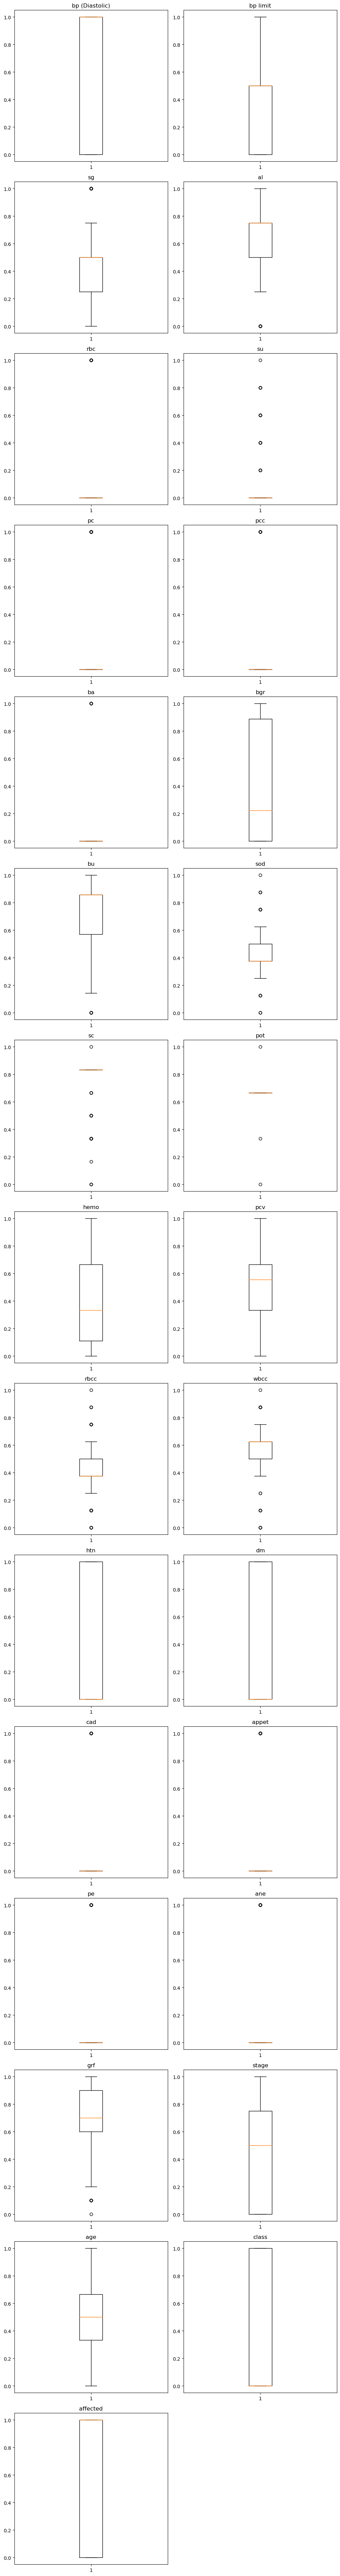

In [67]:
import matplotlib.pyplot as plt

num_cols = len(data1.columns)

# Determine grid size (e.g., 2x2 grid for 4 columns)
rows = (num_cols + 1) // 2
cols = 2

# Create subplots
fig, axs = plt.subplots(rows, cols, figsize=(10, 5 * rows))

# Flatten the axs array if needed (for easier iteration)
axs = axs.flatten()

# Plot each column as a box plot
for i, col in enumerate(data1.columns):
    axs[i].boxplot(data1[col])
    axs[i].set_title(col)

# Remove any unused subplots if the grid is larger than the number of columns
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout()

# Display the box plots
plt.show()

In [61]:
data1 = MinMaxScaler().fit_transform(data1)

In [65]:
data1 = pd.DataFrame(data1,columns=data.columns)

In [66]:
data1

,bp (Diastolic),bp limit,sg,al,rbc,su,pc,pcc,ba,bgr,...,dm,cad,appet,pe,ane,grf,stage,age,class,affected
0,0.0,0.0,0.50,0.00,0.0,0.0,0.0,0.0,0.0,0.888889,...,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.777778,0.0,1.0
1,0.0,0.0,0.00,0.75,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.777778,0.0,1.0
2,0.0,0.0,0.00,1.00,1.0,0.0,1.0,0.0,1.0,0.888889,...,0.0,0.0,1.0,0.0,0.0,0.2,0.00,0.777778,0.0,1.0
3,1.0,0.5,0.00,0.50,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.2,0.00,0.777778,0.0,1.0
4,0.0,0.0,0.25,0.75,0.0,0.0,0.0,0.0,0.0,0.111111,...,1.0,0.0,1.0,1.0,0.0,0.2,0.00,1.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.0,1.0,0.50,0.75,0.0,0.0,0.0,0.0,0.0,0.111111,...,1.0,0.0,0.0,0.0,1.0,0.6,0.50,0.888889,0.0,1.0
196,0.0,0.0,0.50,0.75,0.0,0.0,0.0,0.0,0.0,0.000000,...,1.0,0.0,0.0,0.0,1.0,0.9,0.75,0.888889,0.0,1.0
197,1.0,0.5,1.00,0.75,0.0,0.0,0.0,0.0,0.0,0.888889,...,0.0,0.0,0.0,0.0,0.0,0.7,0.25,0.888889,1.0,0.0
198,1.0,0.5,1.00,0.75,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.1,0.00,0.888889,1.0,0.0
